In [1]:

%matplotlib widget
import matplotlib.pyplot as plt
from polygonal_roadmaps import polygonal_roadmap
import networkx as nx
import numpy as np
import logging
import pandas as pd
import seaborn as sns
from IPython.display import HTML
import plotly.express as px
import plotly.graph_objects as go
import tempfile

logging.getLogger().setLevel(logging.INFO)

%load_ext snakeviz

In [2]:
from plotnine import *
from plotnine.animation import PlotnineAnimation

# for animation in the notebook
from matplotlib import rc
rc('animation', html='html5')

SCEN = 'even/maze-32-32-4-even-4.scen'
plt.close('all')

In [38]:
from polygonal_roadmaps import utils
plans = ['CCR.yml', 'CBS.yml', 'CBS_horizon_3.yml', 'PRIO.yml']
# plans = ['CCR.yml']
scens = ['maze_even.yml', 'maze_random.yml', 'room_32_even.yml', 'room_32_random.yml']
data = {}
profiles = []

d = utils.load_results(path="results")


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11096/11096 [00:22<00:00, 491.20it/s]


In [39]:
d[1].loc[d[1].social_reward.isna(), "social_reward"] = 0
d[1].loc[d[1].anti_social_punishment.isna(), "anti_social_punishment"] = 0
d[1].loc[d[1].horizon.isna(), "horizon"] = 0

In [35]:
d[1].columns

Index(['scen', 'scentype', 'planner_file', 'k', 'sum_of_cost', 'failed',
       'makespan', 'spatial_astar', 'spacetime_astar', 'map_file', 'planner',
       'limit', 'weight', 'social_reward', 'discard_conflicts_beyond',
       'horizon', 'anti_social_punishment', 'max_iter'],
      dtype='object')

/Users/sebastian/opt/anaconda3/envs/random_progress_model/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


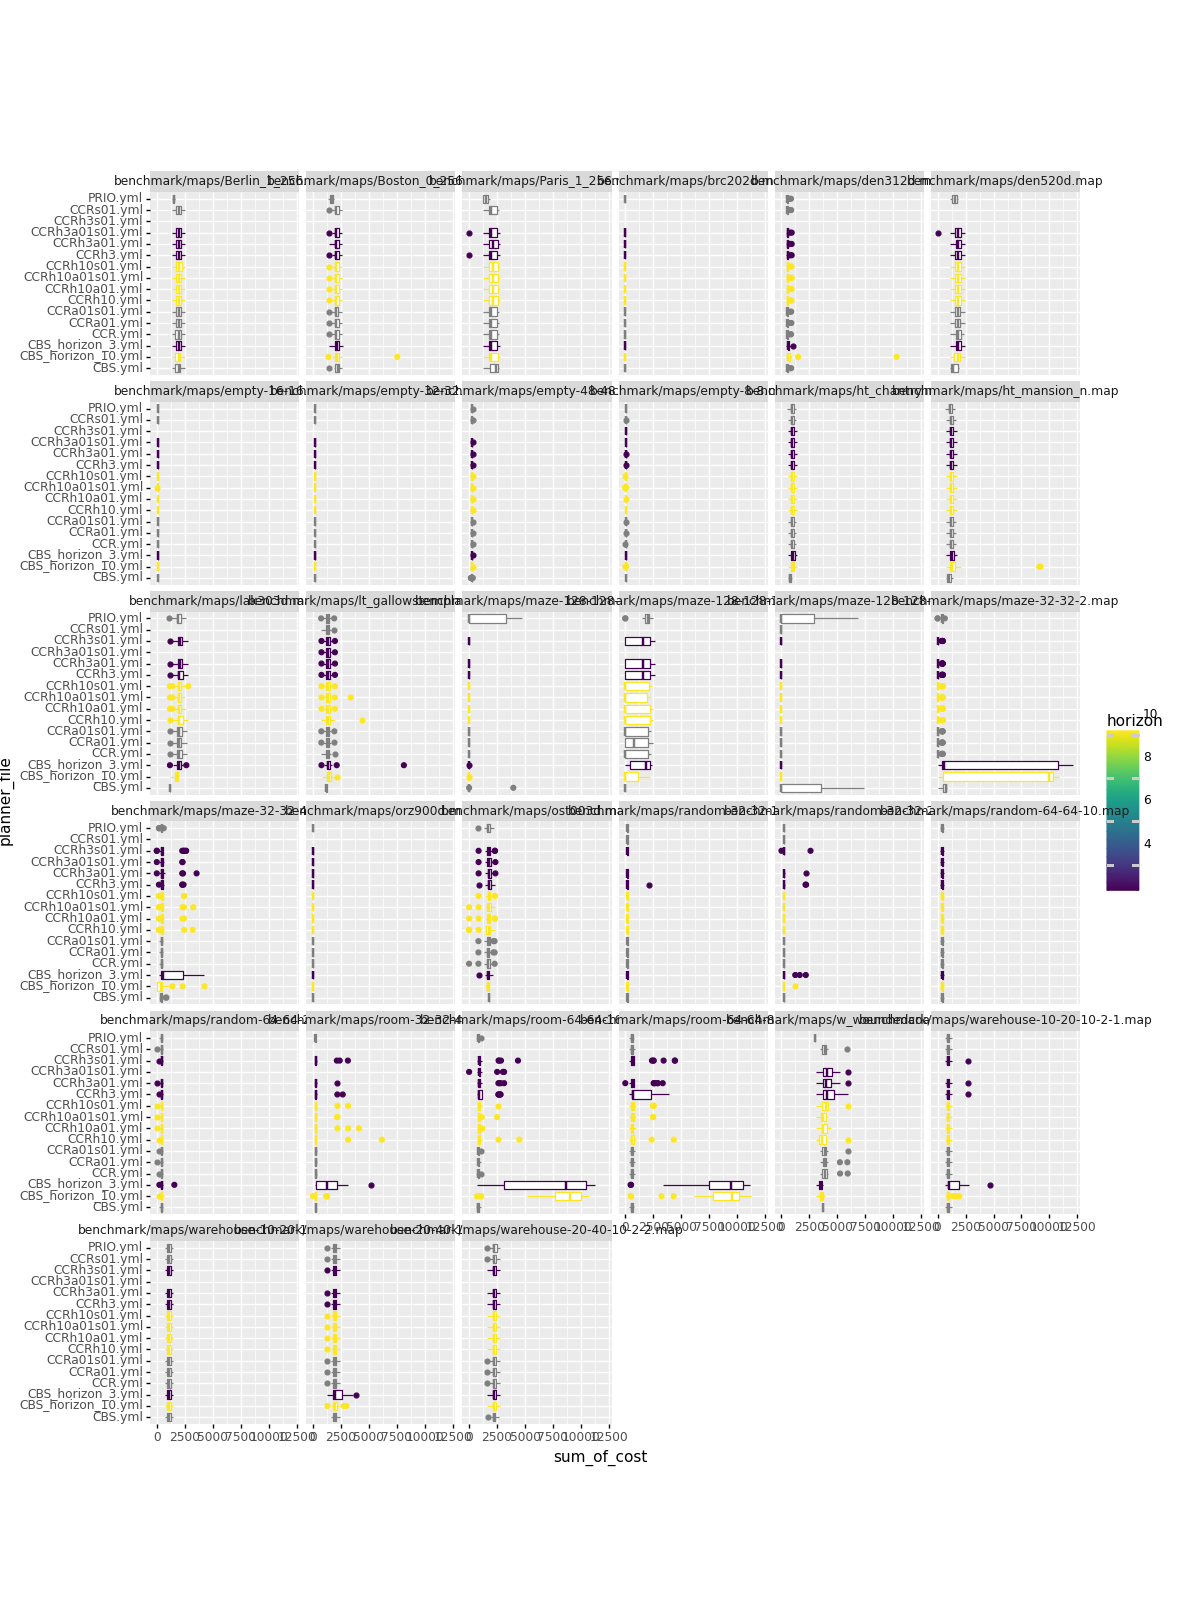

<ggplot: (574029273)>

In [6]:
ggplot(d[1], aes(x='planner_file', y='sum_of_cost', color='horizon')) + geom_boxplot() + coord_flip() + facet_wrap(['map_file']) + theme(figure_size=(12,16))
# plt.tight_layout()

/Users/sebastian/opt/anaconda3/envs/random_progress_model/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


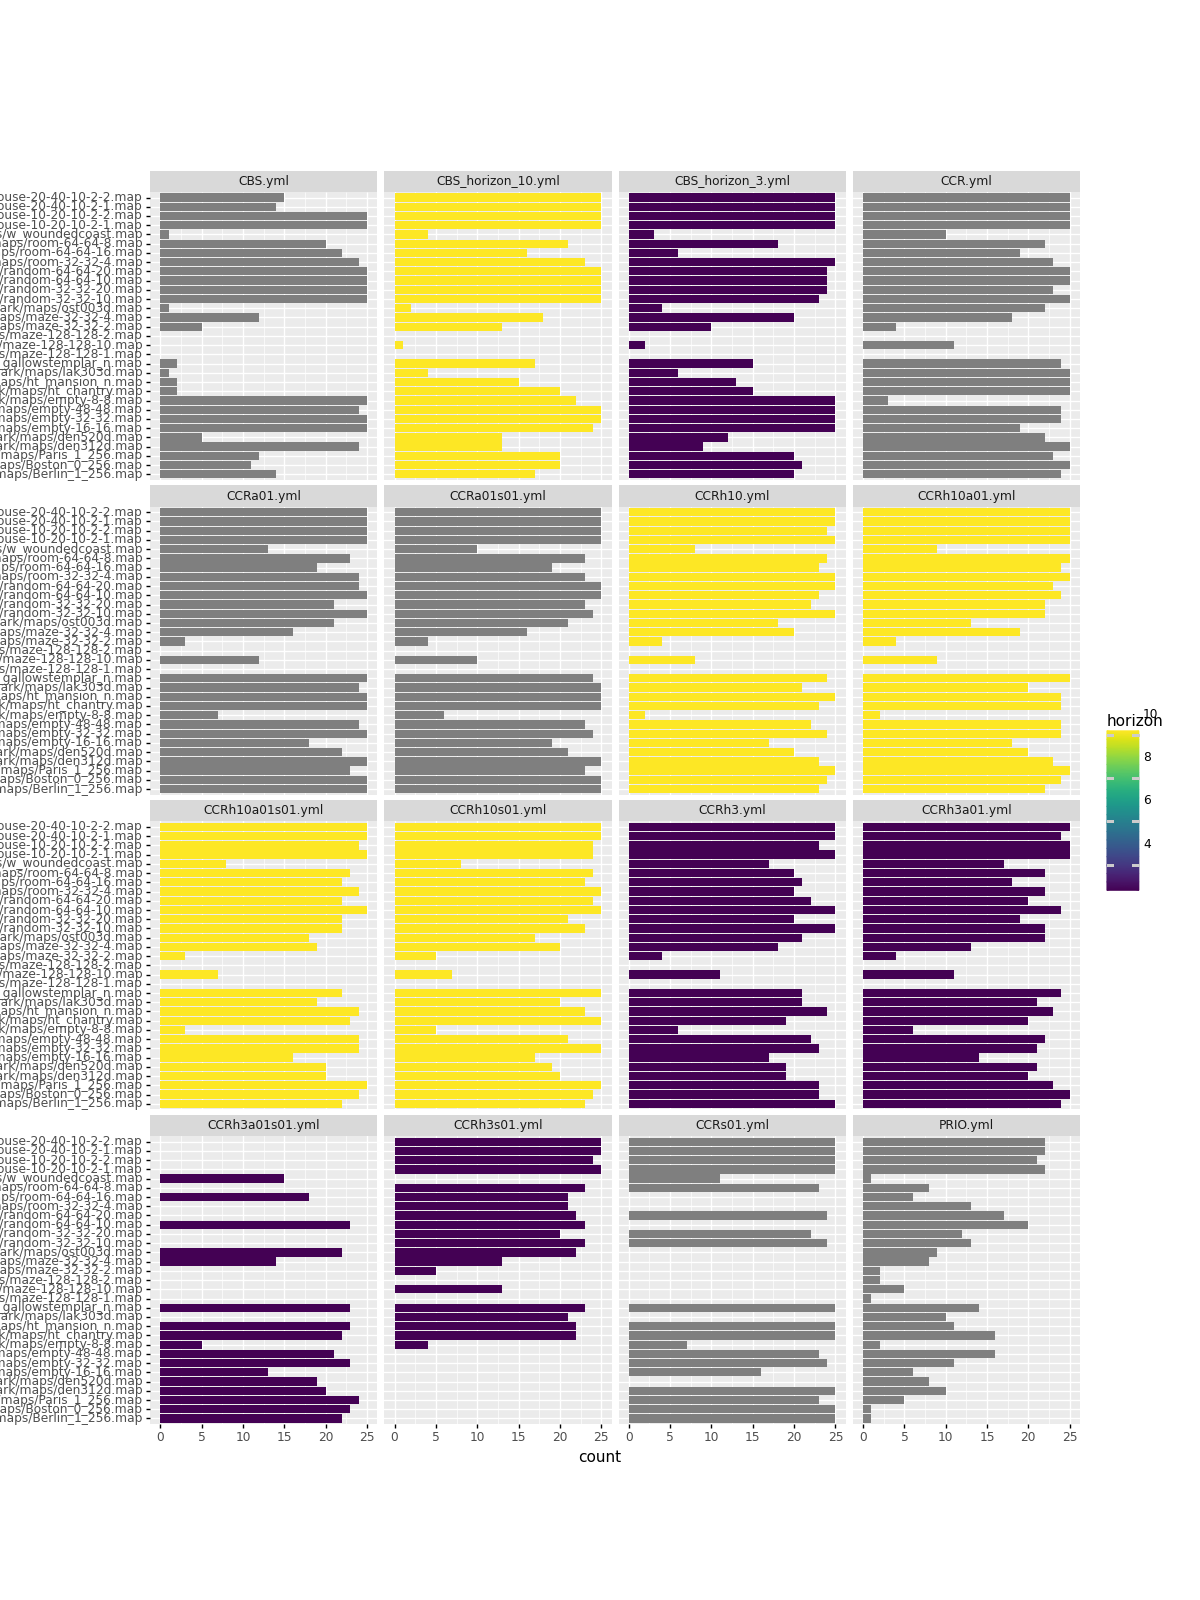

<ggplot: (583269211)>

In [14]:
ggplot(d[1].loc[~d[1].failed], aes(x="map_file", fill="horizon")) + geom_bar() + coord_flip() + facet_wrap(['planner_file']) + theme(figure_size=(12,16))

/Users/sebastian/opt/anaconda3/envs/random_progress_model/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


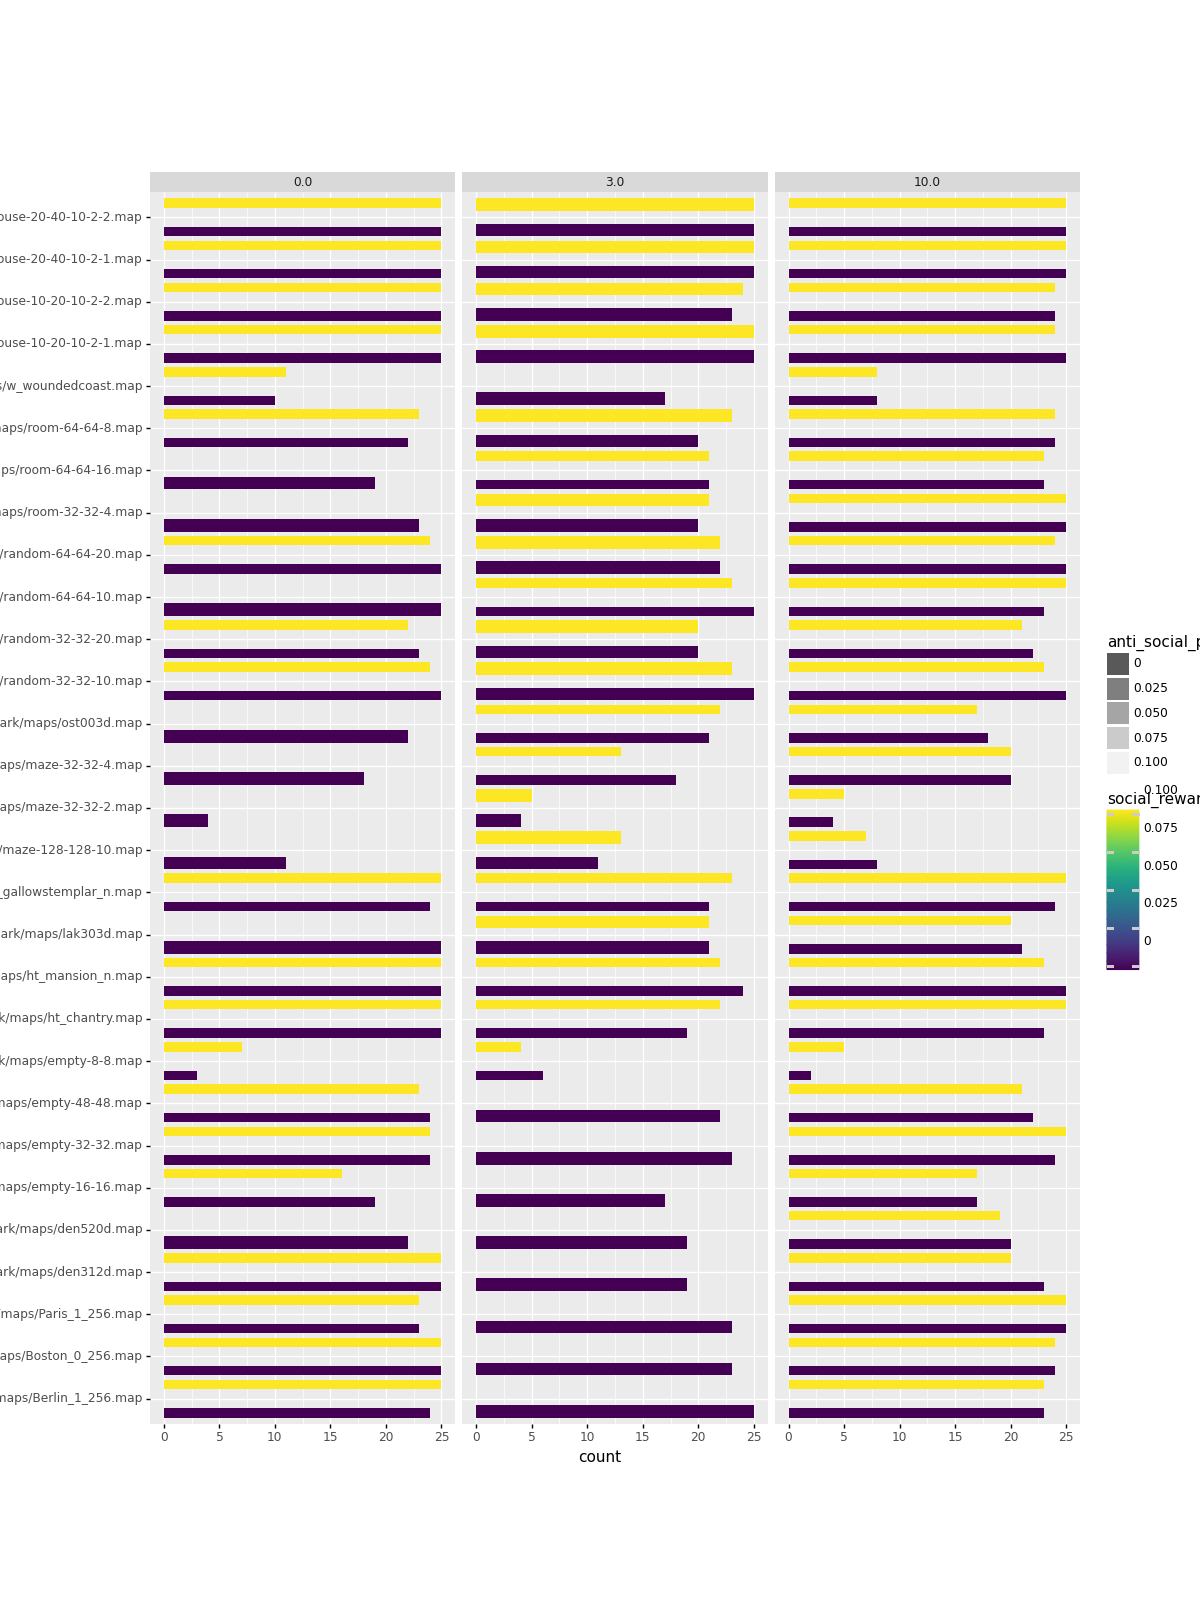

<ggplot: (773894397)>

In [70]:
ggplot(d[1].loc[~d[1].failed & d[1].planner.eq('CCR')], aes(x="map_file", fill="social_reward", alpha="anti_social_punishment", groups="planner_file")) + geom_bar(position="dodge") + coord_flip() + scale_alpha((1, 0)) + theme(figure_size=(12,16)) + facet_wrap("horizon")

/Users/sebastian/opt/anaconda3/envs/random_progress_model/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


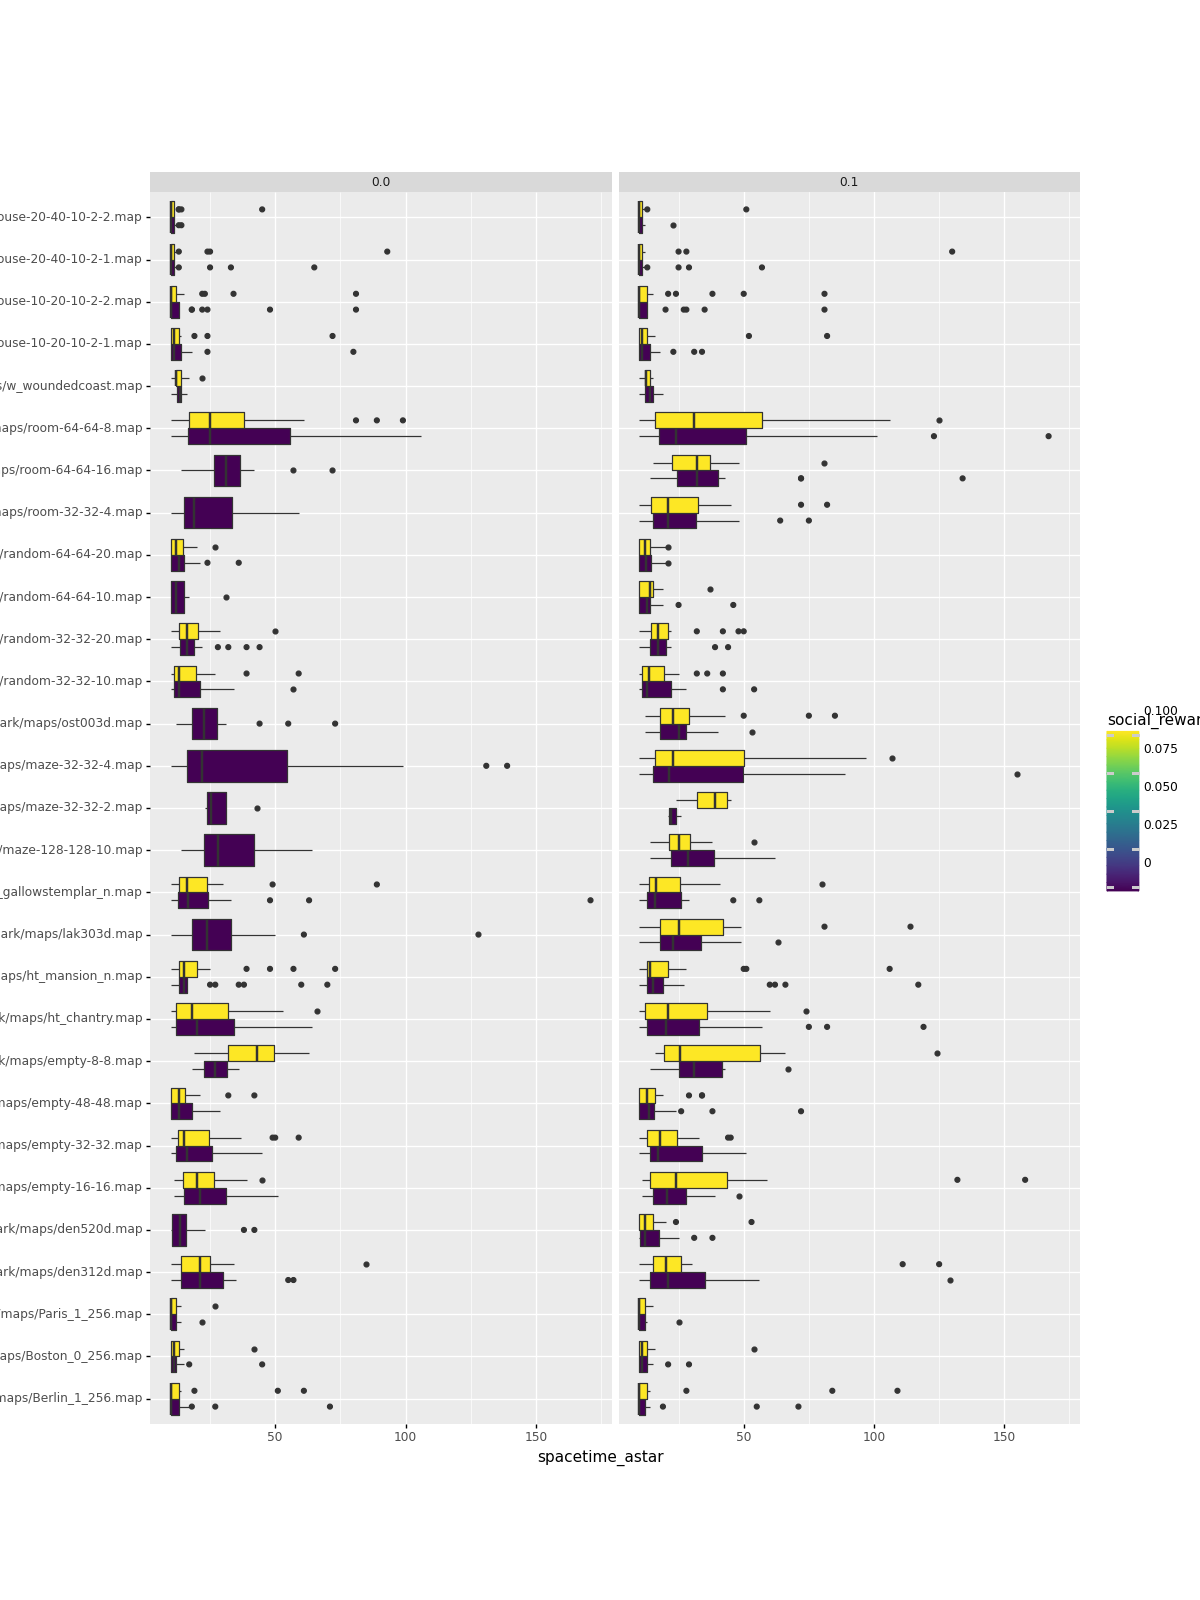

<ggplot: (827420142)>

In [50]:
ggplot(d[1].loc[~d[1].failed & d[1].planner.eq('CCR') & d[1].horizon.eq(0)], aes(x="map_file", y="spacetime_astar", groups="planner_file", fill="social_reward")) + geom_boxplot(position="dodge") + coord_flip() + theme(figure_size=(12,16)) + facet_wrap("anti_social_punishment")

In [54]:
len(d[1].map_file.unique())

33

In [ ]:
ggplot(d[1], aes(x='planner_file', y='spacetime_astar', color='horizon')) + geom_boxplot() + coord_flip() + facet_wrap('map_file') + theme(figure_size=(16, 12))

In [22]:
d[1].head()

,scen,scentype,planner_file,k,sum_of_cost,failed,makespan,spatial_astar,spacetime_astar,map_file,planner,limit,weight,social_reward,discard_conflicts_beyond,horizon,anti_social_punishment,max_iter
0,even/maze-128-128-1-even-1.scen,even,CCRh3s01.yml,-1,0.000000,True,0,1,1,benchmark/maps/maze-128-128-1.map,CCR,200,dist,0.1,3.0,3.0,NaN,NaN
1,even/warehouse-20-40-10-2-2-even-14.scen,even,CCRh3s01.yml,3,2662.206677,False,385,2538,2538,benchmark/maps/warehouse-20-40-10-2-2.map,CCR,200,dist,0.1,3.0,3.0,NaN,NaN
2,even/orz900d-even-22.scen,even,CCRh3s01.yml,-1,0.000000,True,0,10,10,benchmark/maps/orz900d.map,CCR,200,dist,0.1,3.0,3.0,NaN,NaN
3,even/warehouse-20-40-10-2-1-even-9.scen,even,CCRh3s01.yml,2,1754.583490,False,365,1666,1666,benchmark/maps/warehouse-20-40-10-2-1.map,CCR,200,dist,0.1,3.0,3.0,NaN,NaN
4,even/room-64-64-8-even-17.scen,even,CCRh3s01.yml,0,2384.443281,True,1001,2712,400,benchmark/maps/room-64-64-8.map,CCR,200,dist,0.1,3.0,3.0,NaN,NaN


In [ ]:
df_profiles = d[1]
df_profiles.ncalls = df_profiles.ncalls.astype(int)
#df_history = utils.convert_history_to_df(data["CCR.yml"]["maze_even.yml"][SCEN].history)
#run_data = data["CCR.yml"]["maze_even.yml"][SCEN]
#df_obstacles = polygonal_roadmap.MapfInfoEnvironment(SCEN).get_obstacle_df()

In [ ]:
prio_data = run_data.planner_step_history[0]['priorities']
x = []
for i, p in enumerate(prio_data):
    x.append({'x0' : p[0][0],
              'x1' : p[1][0],
              'y0' : p[0][1],
              'y1' : p[1][1],
              'i' : i})
df_prio = pd.DataFrame(x)
del x


In [ ]:
def plot_timestep(t, df, df_obstacles, df_priorities=df_prio):
    if df_priorities is None:
        return ggplot(df_obstacles, aes(x="x", y="y")) + geom_tile(aes(fill="status")) + guides(fill=None) + scale_fill_gray(start=0.1, end=1) + geom_point(df.loc[df.t.eq(t)], aes(x="x", y="y", color="agent")) + geom_path(df, aes(x="x", y="y", color="agent",group="agent")) + coord_fixed(ratio=1)
    return ggplot(df_obstacles, aes(x="x", y="y")) + geom_tile(aes(fill="status")) + guides(fill=None) + scale_fill_gray(start=0.1, end=1)  + geom_segment(df_prio, aes(x="x0", y="y0", xend="x1", yend="y1", color="i"), alpha=0.3, size=1, arrow=arrow(length=0.1)) + scale_color_gradient(low="yellow", high="blue") + geom_point(df.loc[df.t.eq(t)], aes(x="x", y="y")) + geom_path(df, aes(x="x", y="y", group="agent"),alpha=0.3) + coord_fixed(ratio=1)
plot_timestep(27, df_history, df_obstacles, df_priorities="Test")

In [ ]:
# It is better to use a generator instead of a list
plots = (plot_timestep(k, df_history, df_obstacles, df_priorities=df_prio) for k in df_history.t.unique())
ani = PlotnineAnimation(plots, interval=200, repeat_delay=500)
# ani.save('/tmp/animation.mp4')
ani

In [ ]:
ggplot(df_profiles, aes(x='function', y='ncalls', color='planner')) + geom_boxplot() + theme(subplots_adjust={'right': 0.8})
# plt.tight_layout()

In [ ]:
ggplot(df_profiles, aes(x='map_file', y='robustness', color='planner')) + geom_point() + theme(subplots_adjust={'right': 0.8})
# plt.tight_layout()

In [ ]:
df_profiles.loc[df_profiles.robustness >= 1].groupby(['planner', 'scen'])['robustness'].value_counts()

In [ ]:
df_profiles.scen.unique()

In [ ]:
pd.__version__

In [ ]:
data[SCEN].planner_step_history

In [ ]:
df_history.agent.unique()

In [ ]:
plt.close('all')

In [ ]:
import pickle
def read_pickle(location):
    with open(location, 'rb') as pklfile:
        pkl = pickle.load(pklfile)
    return pkl

In [ ]:
import glob
result_files = glob.glob(f"results/*/*/**/result.pkl")
result_files
pkls = {}
for dings in result_files:
    _, planner_config, even, scen, *_ = dings.split('/')
    pkls[planner_config, even, scen] = read_pickle(dings)
pkls

In [ ]:
read_pickle(result_files[0])

In [ ]:
d[1].loc[d[1].function.eq('(astar_path)')].ncalls